# 深度卷积神经网络 (AlexNet)

In [1]:
import d2l
from mxnet import gluon, np, npx
from mxnet.gluon import nn
npx.set_np()

train_iter, test_iter = d2l.load_data_fashion_mnist(
    batch_size=128, resize=224)

定义模型。

In [2]:
net = nn.Sequential()
net.add(# 使用较大的11 x 11窗口来捕获大物体。
        nn.Conv2D(96, kernel_size=11, strides=4, activation='relu'),
        nn.MaxPool2D(pool_size=3, strides=2),
        # 减小卷积窗口，使用填充为2来使得输入与输出的高和宽一致，且增大输出通道数
        nn.Conv2D(256, kernel_size=5, padding=2, activation='relu'),
        nn.MaxPool2D(pool_size=3, strides=2),
        # 连续3个卷积层，且使用更小的卷积窗口。除了最后的卷积层外，进一步增大了输出通道数。
        # 前两个卷积层后不使用池化层来减小输入的高和宽
        nn.Conv2D(384, kernel_size=3, padding=1, activation='relu'),
        nn.Conv2D(384, kernel_size=3, padding=1, activation='relu'),
        nn.Conv2D(256, kernel_size=3, padding=1, activation='relu'),
        nn.MaxPool2D(pool_size=3, strides=2),
        # 这里全连接层的输出个数比LeNet中的大数倍。使用丢弃层来缓解过拟合
        nn.Dense(4096, activation="relu"), nn.Dropout(0.5),
        nn.Dense(4096, activation="relu"), nn.Dropout(0.5),
        nn.Dense(10))

查看每一层的输出形状。

In [3]:
X = np.random.uniform(size=(1, 1, 224, 224))
net.initialize()
for layer in net:
    X = layer(X)
    print(layer.name, 'output shape:\t', X.shape)

conv0 output shape:	 (1, 96, 54, 54)
pool0 output shape:	 (1, 96, 26, 26)
conv1 output shape:	 (1, 256, 26, 26)
pool1 output shape:	 (1, 256, 12, 12)
conv2 output shape:	 (1, 384, 12, 12)
conv3 output shape:	 (1, 384, 12, 12)
conv4 output shape:	 (1, 256, 12, 12)
pool2 output shape:	 (1, 256, 5, 5)
dense0 output shape:	 (1, 4096)
dropout0 output shape:	 (1, 4096)
dense1 output shape:	 (1, 4096)
dropout1 output shape:	 (1, 4096)
dense2 output shape:	 (1, 10)


训练。

loss 0.335, train acc 0.878, test acc 0.889
4070.5 exampes/sec on gpu(0)


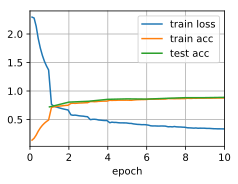

In [4]:
d2l.train_ch5(net, train_iter, test_iter, num_epochs=10, lr=0.01)